#### Setup in Google Colab

In [1]:
!nvidia-smi

Fri Jun  2 08:33:36 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.85.12    Driver Version: 525.85.12    CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   54C    P8    10W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [2]:
import os
HOME = os.getcwd()

## Install YOLOv8


In [3]:
!pip install ultralytics==8.0.20

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.20 🚀 Python-3.10.11 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 23.3/78.2 GB disk)


In [4]:
from ultralytics import YOLO
from IPython.display import display, Image

## Inference with Pre-trained COCO Model

In [5]:
%cd {HOME}
!yolo task=detect mode=predict model=yolov8n.pt conf=0.25 source='https://cdn.britannica.com/32/8132-050-FD658B0B/terrier-Parson-Jack-Russell.jpg' save=True

/content
100% 6.23M/6.23M [00:00<00:00, 203MB/s]

2023-06-02 08:34:19.128091: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-06-02 08:34:20.210793: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Ultralytics YOLOv8.0.20 🚀 Python-3.10.11 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8n summary (fused): 168 layers, 3151904 parameters, 0 gradients, 8.7 GFLOPs
100% 141k/141k [00:00<00:00, 801kB/s] 
image 1/1 /content/terrier-Parson-Jack-Russell.jpg: 544x640 1 dog, 65.8ms
Speed: 0.7ms pre-process, 65.8ms inference, 357.1ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/predict


/content


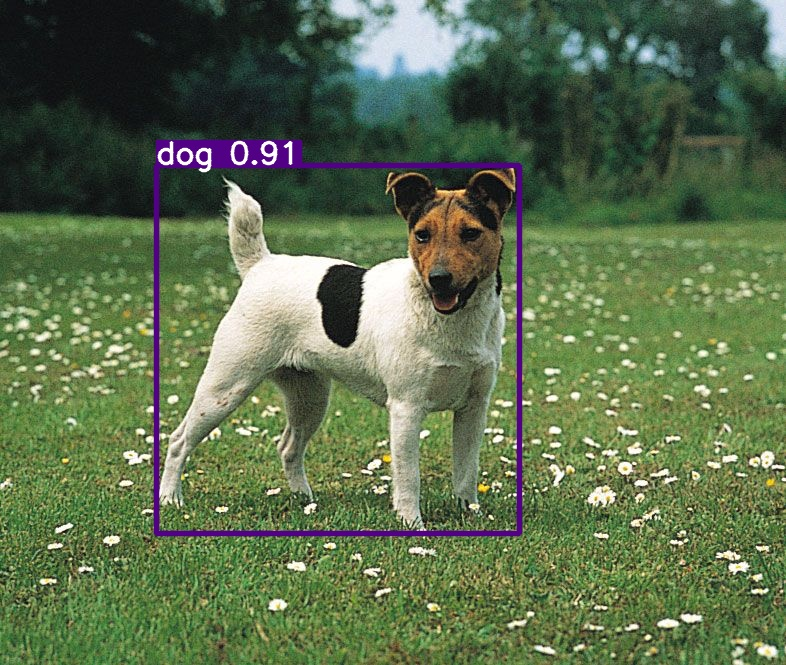

In [6]:
%cd {HOME}
Image(filename='runs/detect/predict/terrier-Parson-Jack-Russell.jpg', height=600)

## Download dataset

In [7]:
!mkdir {HOME}/datasets
%cd {HOME}/datasets

!wget https://github.com/m4556/optical_character_recognition/raw/main/utils/invoice_yolo8.zip

!pip install patool
import patoolib
dataset = patoolib.extract_archive('invoice_yolo8.zip')

/content/datasets
--2023-06-02 08:34:41--  https://github.com/m4556/optical_character_recognition/raw/main/utils/invoice_yolo8.zip
Resolving github.com (github.com)... 140.82.121.4
Connecting to github.com (github.com)|140.82.121.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/m4556/optical_character_recognition/main/utils/invoice_yolo8.zip [following]
--2023-06-02 08:34:41--  https://raw.githubusercontent.com/m4556/optical_character_recognition/main/utils/invoice_yolo8.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 11445318 (11M) [application/zip]
Saving to: ‘invoice_yolo8.zip’

invoice_yolo8.zip   100%[===================>]  10.92M  --.-KB/s    in 0.04s   

2023-06-02 08:34:42 (257 MB/

## Custom Training

In [ ]:
%cd {HOME}

!yolo task=detect mode=train model=yolov8s.pt data=datasets/invoice_yolo8/data.yaml epochs=100 batch=16 imgsz=640 plots=True

In [ ]:
!ls {HOME}/runs/detect/train/

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/confusion_matrix.png', width=600)

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/results.png', width=600)

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/val_batch0_pred.jpg', width=600)

## Validation

In [ ]:
%cd {HOME}
!yolo task=detect mode=val model={HOME}/runs/detect/train/weights/best.pt data=datasets/invoice_yolo8/data.yaml

## Inference

In [ ]:
%cd {HOME}
!yolo task=detect mode=predict model={HOME}/runs/detect/train/weights/best.pt conf=0.25 source=datasets/invoice_yolo8//test/images save=True 

# save_crop option for later use in tesseract
!yolo task=detect mode=predict model={HOME}/runs/detect/train/weights/best.pt conf=0.25 source=datasets/invoice_yolo8//test/images save=True hide_labels= True save_crop

In [ ]:
import glob
from IPython.display import Image, display
image = glob.glob(f'{HOME}/runs/detect/predict/*.jpg')[6]
display(Image(filename=image, width=600))

## Using Tesseract Pre-trained LSTM Model
add Fine-tuned LSTM Model

In [ ]:
!pip install pytesseract
import pytesseract

!apt-get install tesseract-ocr
pytesseract.pytesseract.tesseract_cmd = '/usr/bin/tesseract'

i=4
number_path = glob.glob(f'{HOME}/runs/detect/predict2/crops/Amount/*.jpg')[i]
date_path = glob.glob(f'{HOME}/runs/detect/predict2/crops/Date/*.jpg')[i]
price_path = glob.glob(f'{HOME}/runs/detect/predict2/crops/Invoice number/*.jpg')[i]

number = pytesseract.image_to_string(number_path)
date = pytesseract.image_to_string(date_path)
amount = pytesseract.image_to_string(price_path)

print("invoice:", number, ", date:", date, ", price:", amount)